In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False   



In [134]:
data=pd.read_csv('./boss.csv')
data.head()

,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程"
0,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划"
1,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学"
2,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,"
3,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师"
4,百川创意,数据分析工程师,长沙,8-13K,1-3年本科,互联网,"分配策略,数据分析工程师,业务发展趋势,业务分析,渠道"


In [135]:
#读取数据，为数据添加名称
data=pd.read_csv('./boss.csv',names=['公司','职位','地区','薪资','学位','公司所属行业','职位要求能力'])
data.head()

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程"
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划"
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学"
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,"
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师"


In [136]:
#查看数据总体信息
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 7 columns):
公司        2537 non-null object
职位        2537 non-null object
地区        2537 non-null object
薪资        2537 non-null object
学位        2537 non-null object
公司所属行业    2537 non-null object
职位要求能力    2537 non-null object
dtypes: object(7)
memory usage: 138.8+ KB


In [137]:
#查看重复信息
data[data.duplicated()]
print('重复数据数目为:',len(data[data.duplicated()]))

重复数据数目为: 11


In [138]:
#删除重复信息
data.drop_duplicates(inplace=True)
#查看数据总体信息，删除重复信息成功
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2526 entries, 0 to 2536
Data columns (total 7 columns):
公司        2526 non-null object
职位        2526 non-null object
地区        2526 non-null object
薪资        2526 non-null object
学位        2526 non-null object
公司所属行业    2526 non-null object
职位要求能力    2526 non-null object
dtypes: object(7)
memory usage: 157.9+ KB


In [139]:
data.head(30) # 目的是查看薪资这列 , 可以看到有多余的点 和"薪" 需要操作 

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程"
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划"
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学"
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,"
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师"
5,百川创意,数据分析工程师,长沙,8-13K,1-3年本科,互联网,"分配策略,数据分析工程师,业务发展趋势,业务分析,渠道"
6,新东方教育,数据分析专员(J15498),长沙,5-6K,1-3年本科,在线教育,"数据播报,数据分析专员,审核,合规,专项报告"
7,滴滴,数据分析专家,长沙,10-15K·15薪,3-5年大专,移动互联网,"数据挖掘,商业分析,异常提醒,建模,数据分析专家"
8,御强化妆品,数据分析师,长沙,8-10K·14薪,3-5年大专,电子商务,"数据分析师,电商平台,运营,行业情况,运营分析"
9,先康健康,产品数据分析师,长沙,7-9K,经验不限本科,学术/科研,"数据结构,大数据,产品数据分析,健康管理,系统数据分析"


In [140]:
# 重新做个新列的 薪数
def split_year(data):
    if '·' in data:
        index=data.find('·')  #  找到 ·的索引 
        df=data[index+1:] # 从索引的加一位开始  取到的是 比如 15薪 
    else:
        df='12薪'
    #返回值
    return df

data['薪数']=data['薪资'].map(split_year)

In [141]:
data.head()

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12薪
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12薪
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12薪
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12薪
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12薪


In [142]:
s = 'nihao'

s.find('i')

1

In [143]:
s.upper()

'NIHAO'

In [144]:

#  去掉薪资的中的 K 
def split_salary(data):
    if 'K' in data.upper():
        #获取索引
        index=data.find('K')
        df=data[0:index]
    else:
        df=data
    #返回值
    return df

In [145]:
data['薪资区间']=data['薪资'].map(split_salary)
data.head()

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数,薪资区间
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12薪,9-14
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12薪,2-3
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12薪,5-10
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12薪,3-8
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12薪,10-15


In [146]:
s = '9-14'

s.split('-')

['9', '14']

In [147]:
data['薪资区间']

0        9-14
1         2-3
2        5-10
3         3-8
4       10-15
5        8-13
6         5-6
7       10-15
8        8-10
9         7-9
10      10-15
11       5-10
12        5-9
13      10-15
14        5-8
15       6-10
16       8-12
17        5-6
18        5-7
19      15-20
20        4-7
21      30-50
22      10-15
23        4-6
24        3-7
25        5-8
26        5-8
27        5-6
28      10-15
29        7-8
        ...  
2507    10-15
2508      6-8
2509      6-8
2510      6-8
2511      5-8
2512    10-15
2513      6-8
2514     6-11
2515    20-25
2516     7-10
2517    12-24
2518      3-5
2519     5-10
2520      3-8
2521     9-14
2522      3-5
2523      6-8
2524    10-15
2525      6-8
2526     6-11
2527      6-7
2528     6-10
2529     7-10
2530      4-6
2531    15-30
2532      6-8
2533     7-10
2534      6-8
2535      4-6
2536      4-6
Name: 薪资区间, Length: 2526, dtype: object

In [148]:
data['薪资区间'].str.split('-')

0        [9, 14]
1         [2, 3]
2        [5, 10]
3         [3, 8]
4       [10, 15]
5        [8, 13]
6         [5, 6]
7       [10, 15]
8        [8, 10]
9         [7, 9]
10      [10, 15]
11       [5, 10]
12        [5, 9]
13      [10, 15]
14        [5, 8]
15       [6, 10]
16       [8, 12]
17        [5, 6]
18        [5, 7]
19      [15, 20]
20        [4, 7]
21      [30, 50]
22      [10, 15]
23        [4, 6]
24        [3, 7]
25        [5, 8]
26        [5, 8]
27        [5, 6]
28      [10, 15]
29        [7, 8]
          ...   
2507    [10, 15]
2508      [6, 8]
2509      [6, 8]
2510      [6, 8]
2511      [5, 8]
2512    [10, 15]
2513      [6, 8]
2514     [6, 11]
2515    [20, 25]
2516     [7, 10]
2517    [12, 24]
2518      [3, 5]
2519     [5, 10]
2520      [3, 8]
2521     [9, 14]
2522      [3, 5]
2523      [6, 8]
2524    [10, 15]
2525      [6, 8]
2526     [6, 11]
2527      [6, 7]
2528     [6, 10]
2529     [7, 10]
2530      [4, 6]
2531    [15, 30]
2532      [6, 8]
2533     [7, 10]
2534      [6, 

In [149]:
data['薪资区间'].str.split('-',expand = True)  # expand 是为了等于一个 df形式 

,0,1
0,9,14
1,2,3
2,5,10
3,3,8
4,10,15
5,8,13
6,5,6
7,10,15
8,8,10
9,7,9


In [150]:
data['low_salary']=data['薪资区间'].str.split('-',expand = True)[0]
data['high_salary']=data['薪资区间'].str.split('-',expand = True)[1]



In [151]:
data['薪数']=data['薪数'].str.replace('薪','').astype('int')
data.head()

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15


In [152]:
data['low_salary']=data['low_salary'].astype('int')

In [153]:
data['high_salary']=data['high_salary'].astype('int')

ValueError: invalid literal for int() with base 10: '150元/天'

In [154]:
df1=data[~data['high_salary'].str.contains('元/天')]

In [155]:
df1['high_salary']=df1['high_salary'].astype('int')

In [156]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2490 entries, 0 to 2536
Data columns (total 11 columns):
公司             2490 non-null object
职位             2490 non-null object
地区             2490 non-null object
薪资             2490 non-null object
学位             2490 non-null object
公司所属行业         2490 non-null object
职位要求能力         2490 non-null object
薪数             2490 non-null int32
薪资区间           2490 non-null object
low_salary     2490 non-null int32
high_salary    2490 non-null int32
dtypes: int32(3), object(8)
memory usage: 204.3+ KB


In [157]:
df1.head()

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15


In [158]:
def avg_salary(low_salary,high_salary):
    return (low_salary+high_salary)/ 2

def func(row):
    return avg_salary(row['low_salary'],row['high_salary'])

df1['avg_salary']=df1.apply(func ,axis=1)

df1.head()

,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5


In [123]:
def avg_salary(low_salary,high_salary,salary_num):
    return (low_salary+high_salary)/ 2


def func():
    return avg_salary(row['low_salary'],row['high_salary'],row['薪数'])
df1['avg_salary']=df1.apply(lambda row:avg_salary(row['low_salary'],row['high_salary'],row['薪数']),axis=1)

print(len(df1))
df1.head()

2490


,公司,职位,地区,薪资,学位,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5


### 可视化

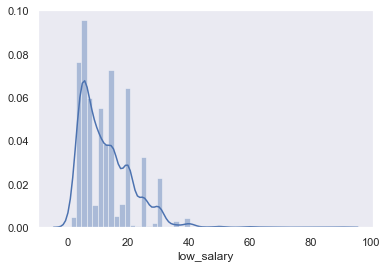

In [163]:
#观察薪资情况
import matplotlib.pyplot as plt
import seaborn as sns

#设置风格
sns.set(style='dark')
#画直方图
sns.distplot(df1['low_salary'])
#展示
plt.show()

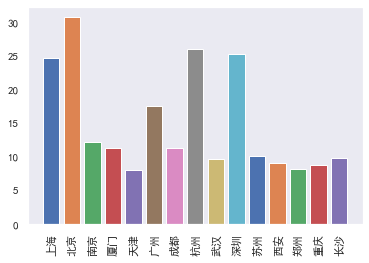

In [165]:
#分析地区对数据分析师薪资影响

plt.rcParams['font.sans-serif'] = ['SimHei'] 
plt.rcParams['axes.unicode_minus'] = False 
#分组
groups = df1.groupby(by='地区')
#x轴标签
xticks = []
for group_name,group_df in groups:
    #添加标签
    xticks.append(group_name)
    #柱状图
    plt.bar(group_name,group_df.avg_salary.mean())
#设置标签
plt.xticks(xticks,rotation=90)
#展示图形
#北京杭州上海这三个地方工资是最高的深圳排第四
plt.show()

Text(0.5, 1.0, '薪资大于10K各城市占比')

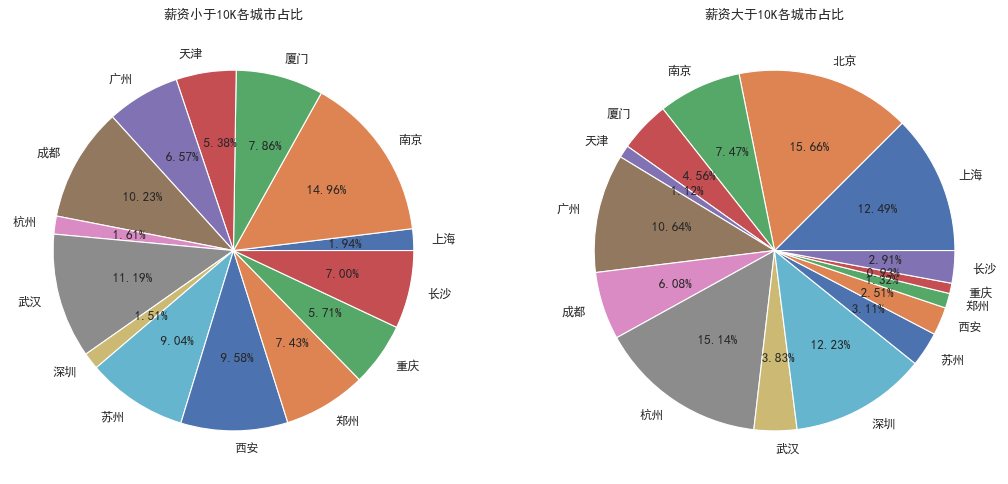

In [166]:
plt.figure(figsize=(16, 16), dpi=80)
plt.subplot(121)
# 各个地区 平均工资小于10 的 饼图
temp = df1[df1.avg_salary < 10].groupby('地区').avg_salary.count()
plt.pie(temp, labels=temp.index, autopct='% .2f%%')
plt.title('薪资小于10K各城市占比')


plt.subplot(122)
# 各个地区 平均工资大于10 的 饼图
temp = df1[df1.avg_salary > 10].groupby('地区').avg_salary.count()
plt.pie(temp, labels=temp.index, autopct='% .2f%%')
plt.title('薪资大于10K各城市占比')

In [168]:
# 学位对数据分析师的薪酬的影响
df1.rename(columns={'学位':'学位经验'},inplace=True)
df1.columns

Index(['公司', '职位', '地区', '薪资', '学位经验', '公司所属行业', '职位要求能力', '薪数', '薪资区间',
       'low_salary', 'high_salary', 'avg_salary'],
      dtype='object')

In [169]:
df1.head()

,公司,职位,地区,薪资,学位经验,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5


In [170]:
df1['学位']=df1['学位经验'].str[-2:]
df1.head()

,公司,职位,地区,薪资,学位经验,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary,学位
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5,本科
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5,不限
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5,大专
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5,大专
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5,本科


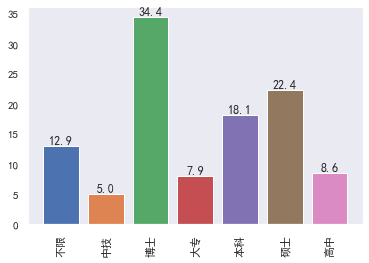

In [171]:
#分组看学位所对应的薪资 
groups = df1.groupby(by='学位')
#x轴标签
xticks = []
yticks = []
for group_name, group_df in groups:

    xticks.append(group_name)
    yticks.append(group_df.avg_salary.mean())
    plt.bar(group_name, group_df.avg_salary.mean())

for x, y in zip(xticks, yticks):
    plt.text(x, y, round(y, 1), va='bottom', ha='center')

#展示图形
#博士硕士学位薪资还是很高的，多读书还是有用的
plt.xticks(xticks, rotation=90)
plt.show()

In [172]:
#  经验对数据分析师的薪酬的影响¶

df1['经验']=df1['学位经验'].str[:-2]

In [173]:
df1.head(15)

,公司,职位,地区,薪资,学位经验,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary,学位,经验
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5,本科,1-3年
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5,不限,经验不限学历
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5,大专,经验不限
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5,大专,3-5年
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5,本科,经验不限
5,百川创意,数据分析工程师,长沙,8-13K,1-3年本科,互联网,"分配策略,数据分析工程师,业务发展趋势,业务分析,渠道",12,8-13,8,13,10.5,本科,1-3年
6,新东方教育,数据分析专员(J15498),长沙,5-6K,1-3年本科,在线教育,"数据播报,数据分析专员,审核,合规,专项报告",12,5-6,5,6,5.5,本科,1-3年
7,滴滴,数据分析专家,长沙,10-15K·15薪,3-5年大专,移动互联网,"数据挖掘,商业分析,异常提醒,建模,数据分析专家",15,10-15,10,15,12.5,大专,3-5年
8,御强化妆品,数据分析师,长沙,8-10K·14薪,3-5年大专,电子商务,"数据分析师,电商平台,运营,行业情况,运营分析",14,8-10,8,10,9.0,大专,3-5年
9,先康健康,产品数据分析师,长沙,7-9K,经验不限本科,学术/科研,"数据结构,大数据,产品数据分析,健康管理,系统数据分析",12,7-9,7,9,8.0,本科,经验不限


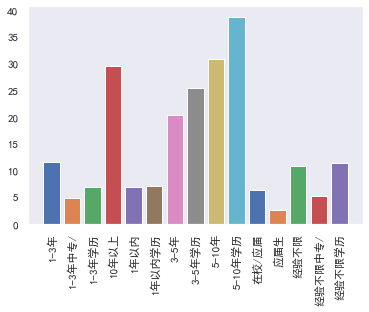

In [174]:

#分组
groups = df1.groupby(by='经验')
#x轴标签
xticks = []
for group_name,group_df in groups:
    xticks.append(group_name)
    plt.bar(group_name,group_df.avg_salary.mean())
plt.xticks(xticks,rotation=90)
#展示图形，很奇怪为啥10年以上经验反而没有5-10年经验工资高
#有可能boss平台工资是有虚假的   
plt.show()

In [175]:
df1['经验']=df1['经验'].str.replace('学历','')
df1['经验']=df1['经验'].str.replace('中专/','')

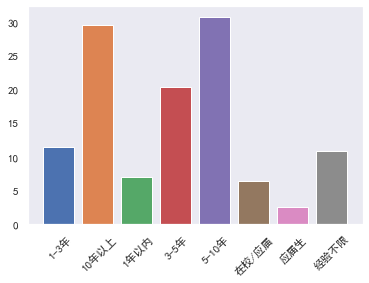

In [177]:

#分组
groups = df1.groupby(by='经验')
#x轴标签
xticks = []
for group_name,group_df in groups:
    xticks.append(group_name)
    plt.bar(group_name,group_df.avg_salary.mean())
plt.xticks(xticks,rotation=45)
#展示图形，很奇怪为啥10年以上经验反而没有5-10年经验工资高
#有可能boss平台工资是有虚假的   
plt.show()

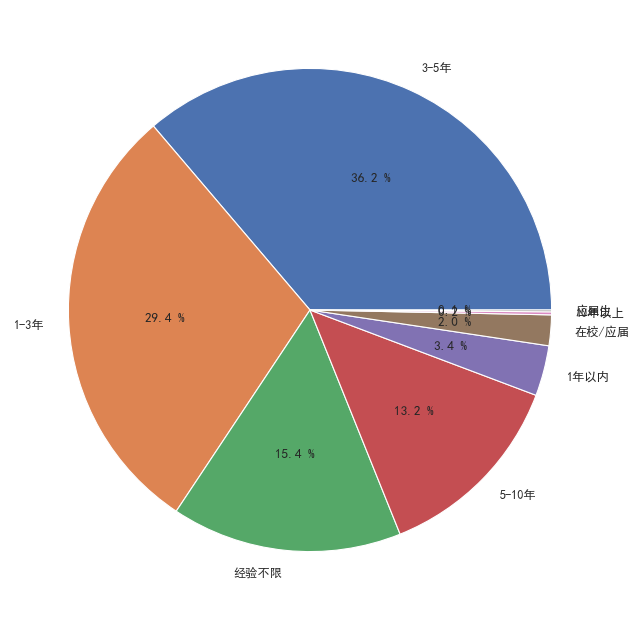

In [180]:
data = df1['经验'].value_counts()
y=data.values
plt.figure(figsize=(10,10),dpi=80)
plt.pie(y,labels=data.index,autopct='%.1f %%')
plt.show()

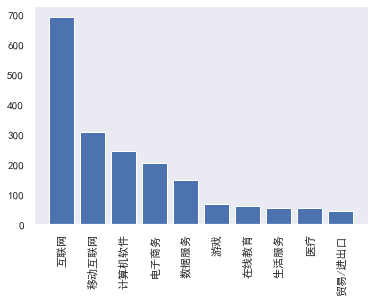

In [181]:
groups = df1.groupby(by='公司所属行业')['avg_salary']
g = groups.size().sort_values(ascending=False)[:10]

plt.bar(g.index, g.values)
plt.xticks(rotation=90)
plt.show()

In [182]:
df1.head()

,公司,职位,地区,薪资,学位经验,公司所属行业,职位要求能力,薪数,薪资区间,low_salary,high_salary,avg_salary,学位,经验
0,安存科技,数据分析师,长沙,9-14K,1-3年本科,计算机软件,"数据挖掘,大数据,工业数据,模型产品,特征工程",12,9-14,9,14,11.5,本科,1-3年
1,名利天下,数据分析师,长沙,2-3K,经验不限学历不限,移动互联网,"数据挖掘,数据分析师,店铺运营管理,战略目标,策划",12,2-3,2,3,2.5,不限,经验不限
2,长沙沃邦,数据分析师,长沙,5-10K,经验不限大专,企业服务,"SPSS,VBA,建模,数据分析师,统计学",12,5-10,5,10,7.5,大专,经验不限
3,谊品,数据分析师,长沙,3-8K,3-5年大专,其他服务业,"Python,SQL,数据分析师,数据分析管理,",12,3-8,3,8,5.5,大专,3-5年
4,众美健康,数据分析师,长沙,10-15K,经验不限本科,计算机软件,"大数据,数据挖掘,数据仓库,商业数据分析,数据分析师",12,10-15,10,15,12.5,本科,经验不限


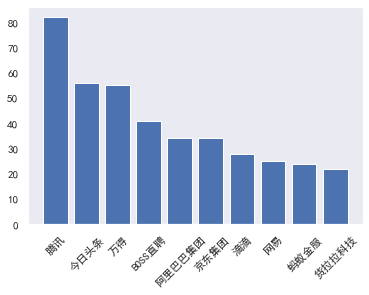

In [185]:
#  给的平均工资最高的前10个公司 
groups = df1.groupby('公司')['avg_salary'].size().sort_values(
    ascending=False)[:10]
plt.bar(groups.index, groups.values)
plt.xticks(rotation=45)
plt.show()

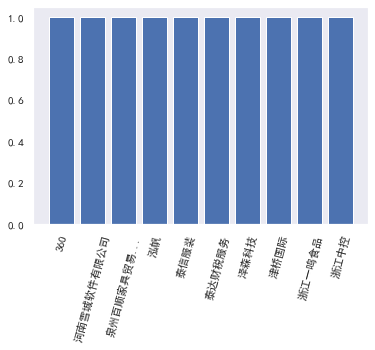

In [187]:
#  给的平均工资最低的前10个公司 
groups = df1.groupby(by='公司')['avg_salary'].size().sort_values(
    )[:10]
plt.bar(groups.index, groups.values)
plt.xticks(rotation=75)
plt.show()

In [189]:
corpus = ' '.join(df1['职位要求能力'])

In [190]:
corpus

'数据挖掘,大数据,工业数据,模型产品,特征工程 数据挖掘,数据分析师,店铺运营管理,战略目标,策划 SPSS,VBA,建模,数据分析师,统计学 Python,SQL,数据分析师,数据分析管理, 大数据,数据挖掘,数据仓库,商业数据分析,数据分析师 分配策略,数据分析工程师,业务发展趋势,业务分析,渠道 数据播报,数据分析专员,审核,合规,专项报告 数据挖掘,商业分析,异常提醒,建模,数据分析专家 数据分析师,电商平台,运营,行业情况,运营分析 数据结构,大数据,产品数据分析,健康管理,系统数据分析 SQL,Python,数据仓库,数据治理,数据开发 商业分析,数据挖掘,Python,SPSS,统计建模 MySQL,大数据,SQL,Python,需求规格说明 数据仓库,数据挖掘,商业分析,预警机制,工具改进 商业分析,数据挖掘,审计分析,数据分析师,负责项目 Excel,能独立,产品项目,相关资料收集,撰写报告 SQL,数据分析师,计算机相关,全日制本科及以上学历,数据中台 资料保密,数据分析岗,收集汇总,各项指标,整理汇总 SQLServer,分配策略,数据分析师,业务发展趋势,业务分析 数据挖掘,商业数据分析,数据分析工程师,项目负责人,渠道 数据分析师,店铺运营,运营操作,电子商务,大专或本科 Excel,SQL,数据仓库,分布式技术,商业智能 SQL,Python,数据挖掘,大数据,转化路径 商业分析,数据挖掘,商业,数据分析工程师,零售服务 数据分析工程师,负责建立,数学模型,大数据,数学建模 统计学,数据挖掘,Python,数据分析师,电子商务 数据化,数据分析师,业务数据,行为数据,部门总监 数据挖掘,业务提升,建模,数据分析师,行业发展动态 R语言,Python,数据挖掘,数据挖掘算法,数据分析师 数据挖掘,销售数据分析,销售数据,业务数据分析,业务分析 仓库环境,HQL,BI,数据分析师,业务部门 数据分析员,费用统计,门店,档案收集,微信群 深入分析,数据分析师,客户业务,资源优化,提供数据支持 Hive,计算机相关专业本科以上学历,企业决策,获取成本,数据分析师 数据仓库,SQL,Hive,策略输出,互联网数据分析 SQL,商业智能,数据分析师,用户画像,计算机 数据挖掘,数据分析师,全国门店,外卖平台,团购平台 数据挖掘,数据处理,Hive,

In [191]:
corpus = corpus.replace(',', '')

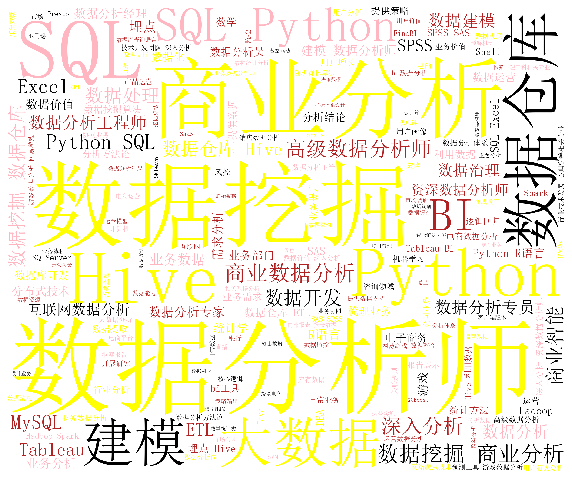

In [194]:
# #建立云图
from matplotlib import colors

color_list = ['#FFB6C1','#FFFF00','#B22222','#000000']

c = colors.ListedColormap(color_list)
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS,
                         background_color='white',
                         width=2400,
                         height=2000,
                         colormap= c,
                         font_path=r'C:\Windows\Fonts\simsun.ttc').generate(
                             corpus, )



#绘制职位要求能力云图
plt.figure(figsize = (10,10))
plt.imshow(wordcloud)  #  imshow()接收一张图像，只是画出该图，并不会立刻显示出来(pycharm中,notebook可以显示)
plt.axis('off')
plt.show()